# Labeling For All Content Types

Use this notebook the final index file and label Alignment Sheets and Figures based on their title. This is the scenario where we have already labeled the tables. This notebook will be removed during the code review and cleaning process.

# Imports

In [1]:
import pickle
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.util import ngrams
from pathlib import Path
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# Setup

## Load our list of keywords created in keywords.py

In [2]:
with open("keywords.pkl", "rb") as f:
    keywords = pickle.load(f)        

In [3]:
print(keywords[14])

['navig navig safeti', 'navig', 'nonnavig', 'navig protect activ', 'guid line', 'guid wire', 'signag', 'waterway', 'cross', 'cross plan', 'impact navig', 'dewat navig water', 'navig water', 'navig waterway', 'navig', 'navig', 'watercours', 'watercours cross', 'water cross', 'cross methodolog', 'horizont direct drill', 'hdd', 'bridg', 'marin', 'marin termin', 'waterway user', 'recreat waterway user', 'navig use', 'tributari', 'tourism', 'tourist', 'guid outfitt', 'outfitt', 'angler', 'cano', 'kayak', 'boat', 'sail', 'sail', 'fisheri ocean canada', 'navig protect act', 'navig watercours', 'navig safeti', 'schedul water', 'non-schedul water', 'recreation-rel navig', 'commercial-rel navig', 'watercours user', 'waterway user', 'watercours cross', 'cross method', 'trenchless cross', 'trench cross', 'navig hazard', 'expos instream', 'buoyanc issu', 'upstream', 'downstream', 'warn sign', 'warn signag', 'instream', 'temporari vehicl cross', 'bed', 'bank', 'preconstruct contour', 'hydraul charac

In [4]:
# list of VCs

labels_list = ['Landscape, terrain, and weather', 
                'Soil',
                'Plants',
                'Water',
                'Fish',
                'Wetlands',
                'Wildlife',
                'Species at Risk',
                'Greenhouse gas emissions',
                'Air emissions',
                'Noise',
                'Electricity and electromagnetism',
                'Proximity to people',
                'Archaeological, paleontological, historical, and culturally significant sites and resources',
                'Human access to boats and waterways',
                'Indigenous land, water, and air use',
                'Impact to social and cultural well-being',
                'Impact to human health and viewscapes',
                'Social, cultural, economic infrastructure and services',
                'Economic Offsets and Impact',
                'Environmental Obligations',
                'Treaty and Indigenous Rights']

# Load Final Index File

This is where we load the 'final' index file so that we can label the figures and alignment sheets.

In [5]:
final_index_path = str(Path().resolve().parents[1]) + '\\Output_Files\\final_index_files\\'

print(final_index_path)

C:\Users\ThibJacq\code\esa-data-bank_banque-donnees-ees\Output_Files\final_index_files\


In [6]:
df = pd.read_csv(final_index_path + 'ESA_website_ENG.csv')
df.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
0,Table 13.2-1 Cost Comparisons of the Three Alternatives Route,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",31,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-1-cost-comparisons-of-the-three-alterna_pt-1_pg-31_doc-num-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Table 13.2-2 Linear Corridors Followed by Each Alternative,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",32,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-2-linear-corridors-followed-by-each-alt_pt-1_pg-32_doc-num-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1


In [7]:
df_tables = df[df['Content Type'].isin(['Table'])]
df_f_as = df[df['Content Type'].isin(['Figure', 'Alignment Sheet'])]

In [8]:
df_tables.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
0,Table 13.2-1 Cost Comparisons of the Three Alternatives Route,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",31,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-1-cost-comparisons-of-the-three-alterna_pt-1_pg-31_doc-num-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Table 13.2-2 Linear Corridors Followed by Each Alternative,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",32,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-2-linear-corridors-followed-by-each-alt_pt-1_pg-32_doc-num-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1


In [9]:
df_f_as.tail(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21423,"Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,499,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/4003703_499.jpg,4003703,4003703_499_a_1,21423
21424,"Figure 14.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Lundbreck Sec...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,500,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/4003703_500.jpg,4003703,4003703_500_a_1,21424


## Labeling For All Content Types

Use this notebook the final index file and label Alignment Sheets and Figures based on their title. This is the scenario where we have already labeled the tables. This notebook will be removed during the code review and cleaning process.

In [10]:
df_f_as['text'] = df_f_as['Title']

In [11]:
from bs4 import BeautifulSoup

df_f_as['text'] = df_f_as['text'].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text(separator=' ')) # remove html tags
df_f_as['text'] = df_f_as['text'].replace('[^a-zA-Z0-9 ]', ' ', regex=True) # remove all non-alpha-numeric characters
df_f_as['text'] = df_f_as['text'].replace('\w{25,}', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace('cid\d+', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace(' s ', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace(' +', ' ', regex=True) # remove all extra spaces in text
df_f_as['text'] = df_f_as['text'].str.lower()

In [12]:
df_f_as['text'] = df_f_as['text'].apply(lambda x: x[:30_000]) # making sure the text is not longer than 30k characters
df_f_as.head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,figure 13 1 1 encana ekwan pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,figure 13 3 1 cea framework
15336,Figure 13.4-1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",44,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_44.jpg,268706,268706_44_f_1,15336,figure 13 4 1 temperature normals measured at the fort nelson airport for the period 1971 to 2000
15337,Figure 13.4-2 Mean Monthly Rainfall and Number of Days with Measurable Rainfall Observed at the ...,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.

In [13]:
table_texts = df_f_as['text'].tolist()

tokenized_table_texts = []
stemmer = PorterStemmer()

for i, table_text in enumerate(table_texts):
    processed_text = word_tokenize(table_text)
    processed_text = [stemmer.stem(w) for w in processed_text if w not in stopwords.words("english")]
    table_ngram_list = []
    for n in range(1, 7):
        table_ngrams = list(ngrams(processed_text, n))
        table_ngram_list.extend([" ".join(table_gram) for table_gram in table_ngrams])

    tokenized_table_texts.append(table_ngram_list)
    
print(tokenized_table_texts[0][0:200])

['figur', '13', '1', '1', 'encana', 'ekwan', 'pipelin', 'figur 13', '13 1', '1 1', '1 encana', 'encana ekwan', 'ekwan pipelin', 'figur 13 1', '13 1 1', '1 1 encana', '1 encana ekwan', 'encana ekwan pipelin', 'figur 13 1 1', '13 1 1 encana', '1 1 encana ekwan', '1 encana ekwan pipelin', 'figur 13 1 1 encana', '13 1 1 encana ekwan', '1 1 encana ekwan pipelin', 'figur 13 1 1 encana ekwan', '13 1 1 encana ekwan pipelin']


In [14]:
with open('tokenized_figure_alignment_sheet_titles.pkl', 'wb') as f:
    pickle.dump(tokenized_table_texts, f)

In [15]:
with open('tokenized_figure_alignment_sheet_titles.pkl', 'rb') as f:
    tokenized_table_text = pickle.load(f)

In [16]:
print(tokenized_table_text[0][:10], '\n', tokenized_table_text[-1][:50])

['figur', '13', '1', '1', 'encana', 'ekwan', 'pipelin', 'figur 13', '13 1', '1 1'] 
 ['figur', '14', '2', 'locat', 'nearest', 'popul', 'land', 'base', 'engag', 'indigen', 'group', 'lundbreck', 'section', 'figur 14', '14 2', '2 locat', 'locat nearest', 'nearest popul', 'popul land', 'land base', 'base engag', 'engag indigen', 'indigen group', 'group lundbreck', 'lundbreck section', 'figur 14 2', '14 2 locat', '2 locat nearest', 'locat nearest popul', 'nearest popul land', 'popul land base', 'land base engag', 'base engag indigen', 'engag indigen group', 'indigen group lundbreck', 'group lundbreck section', 'figur 14 2 locat', '14 2 locat nearest', '2 locat nearest popul', 'locat nearest popul land', 'nearest popul land base', 'popul land base engag', 'land base engag indigen', 'base engag indigen group', 'engag indigen group lundbreck', 'indigen group lundbreck section', 'figur 14 2 locat nearest', '14 2 locat nearest popul', '2 locat nearest popul land', 'locat nearest popul land base'

In [17]:
for label in labels_list:
    df_f_as[f'{label}'] = 0
    # df_f_as[f'{label} - Number of Matches'] = 0
    # df_f_as[f'{label} Relevance'] = 0

df_f_as.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,figure 13 1 1 encana ekwan pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,figure 13 3 1 cea framework


In [18]:
def label_with_keywords(i, table_text, keywords_for_label, label):
    number_of_matches = len([word for word in keywords_for_label if word in table_text])
    df_f_as[f'{label}'][i] = number_of_matches

In [19]:
def string_total_sum_match_2_lists(list_1, list_2):
    """
    This function takes two lists of strings and counts the number of total matches between the two lists, including duplicates.
    The function returns the number of total matches.
    """
    # Initialize the count variable.
    count = 0
    # Iterate over the first list.
    for item in list_1:
        # If the item is in the second list, increment the count variable.
        if item in list_2:
            count += 1
    # Return the count variable.
    return count

In [20]:
df_f_as.text.iloc[-1]

'figure 14 2 locations of nearest populated land base of engaged indigenous groups lundbreck section'

In [21]:
df_f_as.index[0]

15334

In [22]:
for i, table_text in zip(df_f_as.index, tokenized_table_text):
    for keywords_for_label, label in zip(keywords, labels_list):
        number_of_matches = string_total_sum_match_2_lists(table_text, keywords_for_label)
        df_f_as[f'{label}'][i] = number_of_matches
        
with open("esa_index_ENG_labeled.pkl", "wb") as f:
    pickle.dump(df_f_as, f)

df_f_as.head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,figure 13 1 1 encana ekwan pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,figure 13 3 1 cea framework
15336,Figure 13.4-1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",44,107.0,1.41,Yes,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,thumbnails/268706_44.jpg,268706,268706_44_f_1,15336,figure 13 4 1 temperature normals measured at the fort nelson airport for the period 1971 to 2000
15337,Figure 13.4-2 Mean Monthly Rainfall and Number of Days with Measurable Rainfall Observed at the ...,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.

In [23]:
df_f_as.iloc[-56:-54, 29:]

,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
21369,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/3974108_442.jpg,3974108,3974108_442_a_1,21369,figure 2 2 locations of nearest populated land base of engaged indigenous groups lundbreck section
21370,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/3974307_115.jpg,3974307,3974307_115_a_1,21370,figure e 1 problem soil handling procedure decision chart


# Drop text and remerge index

In [24]:
df_f_as.drop(columns=['text'], inplace=True)

In [25]:
df = df_tables.append(df_f_as)
df.tail(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21423,"Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,499,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/4003703_499.jpg,4003703,4003703_499_a_1,21423
21424,"Figure 14.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Lundbreck Sec...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,500,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/4003703_500.jpg,4003703,4003703_500_a_1,21424


# Normalize match values

In [26]:
import numpy as np
max_value_list = []
df_norm = df.copy()
for content_type in ['Table', 'Figure', 'Alignment Sheet']:
    df_content_type = df[df['Content Type'] == content_type]
    for label in labels_list:
        df_log = np.log2(df_content_type[f'{label}'].replace(0, np.nan) + 1)
        max_vc = df_log.max()
        updated_vc_col = df_log / max_vc * 100
        updated_vc_col.replace(np.nan, 0, inplace=True)
        df_content_type[f'{label}'] = np.ceil(updated_vc_col).astype(int)
        max_value_list.append([content_type, label, max_vc])
    df_norm.loc[df_content_type.index] = df_content_type

In [27]:
(unique, counts) = np.unique(df_norm, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

NameError: name 'scaled' is not defined

In [28]:
df_norm_tables = df_norm[df_norm['Content Type'] == 'Table']
df_norm_alignment_sheets = df_norm[df_norm['Content Type'] == 'Alignment Sheet']
df_norm_figures = df_norm[df_norm['Content Type'] == 'Figure']

array([<AxesSubplot:title={'center':'Soil'}>], dtype=object)

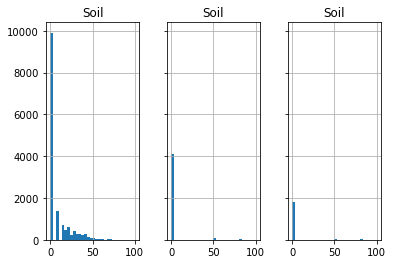

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')

num = 1

df_norm_tables.hist(column = labels_list[num], bins = 30, ax=ax[0], figsize=(10, 10))
df_norm_alignment_sheets.hist(column = labels_list[num], bins = 30, ax=ax[1], figsize=(10, 10))
df_norm_figures.hist(column = labels_list[num], bins = 30, ax=ax[2], figsize=(10, 10))


In [30]:
df_norm.tail()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21420,Figure 10.3 Protective and Consultative Notations - Lundbreck Section,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,297,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,thumbnails/4003703_297.jpg,4003703,4003703_297_a_1,21420
21421,"Figure 11.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,323,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_323.jpg,4003703,4003703_323_a_1,21421
21422,"Figure 11.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Lundbreck Sec...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,324,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_324.jpg,4003703,4003703_324_a_1,21422
21423,"Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,

In [31]:
df = df_norm.copy()

# Adding Alignment Sheet in Alignment Sheet rows with Figure in Title

In [32]:
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('Figure')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('FIGURE')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('figure')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']

df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('Table')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('TABLE')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('table')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.tail()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21420,(Alignment Sheet) Figure 10.3 Protective and Consultative Notations - Lundbreck Section,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,297,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,thumbnails/4003703_297.jpg,4003703,4003703_297_a_1,21420
21421,(Alignment Sheet) Figure 11.1 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,323,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_323.jpg,4003703,4003703_323_a_1,21421
21422,(Alignment Sheet) Figure 11.2 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,324,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_324.jpg,4003703,4003703_324_a_1,21422
21423,(Alignment Sheet) Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,

# Load Alignment Sheet Titles for French Index

In [33]:
Data_Files_Path = str(Path().resolve().parents[1]) + '\\Data_Files\\'
print(Data_Files_Path)

C:\Users\ThibJacq\code\esa-data-bank_banque-donnees-ees\Data_Files\


In [34]:
df_new_align = pd.read_csv(Data_Files_Path + "Intermediate_Index_Files\\new_alignment_sheet_titles_for_translation_FR_fixed.csv")

In [39]:
df_new_align.tail()

,Title,Titre,ID
367,Figure E.1 Problem Soil Handling Procedure Decision Chart,Figure E.1 Tableau de décision sur la méthode de manutention des sols à l’origine de problèmes,3974307_115
368,Figure E.1 Problem Soil Handling Procedure Decision Chart,Figure E.1 Tableau de décision sur la méthode de manutention des sols à l’origine de problèmes,3974307_233
369,Figure E.1 Problem Soil Handling Procedure Decision Chart,Figure E.1 Tableau de décision sur la méthode de manutention des sols à l’origine de problèmes,3974307_347
370,Figure 1 Migratory Bird Nesting Zones in Canada,Figure 1 Zones de nidification des oiseaux migrateurs au Canada,3969837_215
371,Figure E‐1 Problem Soil Handling Procedure Decision Chart,Figure E‐1 Tableau de décision sur la méthode de manutention des sols à l’origine de problèmes,3970827_83


# Add VCs to French Index

In [702]:
df_fra = pd.read_csv(final_index_path + 'ESA_website_FRA.csv')

df_fra.head(2)

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
0,Tableau 13.2-1 Comparaison des coûts des trois tracés de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",31.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-1-comparaison-des-coûts-des-trois-tra_pt-1_pg-31_num-du-doc-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Tableau 13.2-2 Couloirs linéaires suivis par chaque solution de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",32.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-2-couloirs-linéaires-suivis-par-chaqu_pt-1_pg-32_num-du-doc-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1


In [703]:
# grabbing the VC columns to put match numbers in French file
df_fra.iloc[:, 29:51] = df.iloc[:, 29:51]
df_fra.iloc[:, 29:51].head()

,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,19,0,0,0
2,16,0,0,14,0,0,16,0,0,0,0,0,0,0,0,10,14,14,27,10,0,10
3,0,0,0,0,0,0,0,0,0,34,0,0,18,0,0,20,0,0,19,16,0,19
4,0,0,0,0,0,0,0,0,0,21,11,0,0,0,0,0,0,0,19,16,0,0


In [704]:
ids_to_update = df[df["ID Internal"].isin(df_new_align["ID"] + '_a_1')]['ID Internal'].tolist()

In [705]:
idx_list = []
for i, id in enumerate(ids_to_update):
    id = id
    idx = df_fra[df_fra["ID Internal"] == id].index[0]
    # print(idx)
    idx_list.append(idx)
    df_fra.loc[idx, 'Titre'] = df_new_align['Titre'][i]
    # print(df_new_align['Titre'][i])
df_fra.iloc[idx_list[20:25]]

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
18307,Figure 11A-1 Résumé des parcours des effets – Pêches et Océans Canada,Carte-tracé,Demande visant le projet d'agrandissement du réseau de Trans Mountain,Agrandissement du réseau de Trans Mountain,2013-12-16,Trans Mountain Pipeline ULC,Pétrole,B6-16 - V5C_TR_5C4_08of8_AIR_GHG - A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/2393181,A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/2393183,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",OH-001-2014,"BGC Engineering Inc., Waterline Resources Inc., TERA Environmental Consultants, Mentiga Pedology...",Demande approuvée,OC-064. OC-065,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/2392873,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3751789,Rapport technique sur la qualité de l'air et les gaz à effet de serre,16.0,"Air, Aspect technique",11.0,57.0,1.87,Oui,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/2393183_11.jpg,2393183,2393183_11_a_1,18307
18308,Figure 11A-11 Parcours des effets – Enlèvement de la structure,Carte-tracé,Demande visant le projet d'agrandissement du réseau de Trans Mountain,Agrandissement du réseau de Trans Mountain,2013-12-16,Trans Mountain Pipeline ULC,Pétrole,B6-16 - V5C_TR_5C4_08of8_AIR_GHG - A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/2393181,A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/2393183,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",OH-001-2014,"BGC Engineering Inc., Waterline Resources Inc., TERA Environmental Consultants, Mentiga Pedology...",Demande approuvée,OC-064. OC-065,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/2392873,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3751789,Rapport technique sur la qualité de l'air et les gaz à effet de serre,16.0,"Air, Aspect technique",12.0,57.0,1.87,Oui,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,39,0,0,34,0,0,0,0,0,0,0,0,0,thumbnails/2393183_12.jpg,2393183,2393183_12_a_1,18308
18309,Figure 12-1 : Emplacements des emprises contiguës et non contiguës pour,Carte-tracé,Demande visant le projet d'agrandissement du réseau de Trans Mountain,Agrandissement du réseau de Trans Mountain,2013-12-16,Trans Mountain Pipeline ULC,Pétrole,B6-16 - V5C_TR_5C4_08of8_AIR_GHG - A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/2393181,A3S1U7,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/2393183,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",OH-001-2014,"BGC Engineering Inc., Waterline Resources Inc., TERA Environmental Con

# Update the Alignment Sheet French Titles

In [706]:
df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('Figure')), 'Titre'] = '(Carte-tracé) ' + df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre']
df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('FIGURE')), 'Titre'] = '(Carte-tracé) ' + df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre']
df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('figure')), 'Titre'] = '(Carte-tracé) ' + df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre']

df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('Tableau')), 'Titre'] = '(Carte-tracé) ' + str(df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre'])
df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('TABLEAU')), 'Titre'] = '(Carte-tracé) ' + str(df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre'])
df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé') & (df_fra['Titre'].str.contains('tableau')), 'Titre'] = '(Carte-tracé) ' + str(df_fra.loc[(df_fra['Type de contenu'] == 'Carte-tracé'), 'Titre'])
df_fra.tail()

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
21420,(Carte-tracé) Figure 10.3 Protective and Consultative Notations - Lundbreck Section,Carte-tracé,Demande visant le projet de livraison parcours ouest de NGTL en 2023,Livraison parcours ouest 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gaz,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/4003703,Projets de grande envergure (plus de 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Demande présentée,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3968941,NaN,"7.0 ÉVALUATION DES EFFETS SUR LA FAUNE ET L'HABITAT FAUNIQUE, 8.0 ÉVALUATION DES EFFETS SUR LES ...",NaN,NaN,297.0,612.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,thumbnails/4003703_297.jpg,4003703,4003703_297_a_1,21420
21421,"(Carte-tracé) Figure 11.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups,...",Carte-tracé,Demande visant le projet de livraison parcours ouest de NGTL en 2023,Livraison parcours ouest 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gaz,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/4003703,Projets de grande envergure (plus de 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Demande présentée,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3968941,NaN,"7.0 ÉVALUATION DES EFFETS SUR LA FAUNE ET L'HABITAT FAUNIQUE, 8.0 ÉVALUATION DES EFFETS SUR LES ...",NaN,NaN,323.0,612.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_323.jpg,4003703,4003703_323_a_1,21421
21422,"(Carte-tracé) Figure 11.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups,...",Carte-tracé,Demande visant le projet de livraison parcours ouest de NGTL en 2023,Livraison parcours ouest 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gaz,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/4003703,Projets de grande envergure (plus de 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Demande présentée,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/3968941,NaN,"7.0 ÉVALUATION DES EFFETS SUR LA FAUNE ET L'HABITAT FAUNIQUE, 8.0 ÉVALUATION DES EFFETS SUR LES ...",NaN,NaN,324.0,612.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_324.jp

# 

In [707]:
df_fra.head()

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
0,Tableau 13.2-1 Comparaison des coûts des trois tracés de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",31.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-1-comparaison-des-coûts-des-trois-tra_pt-1_pg-31_num-du-doc-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Tableau 13.2-2 Couloirs linéaires suivis par chaque solution de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",32.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-2-couloirs-linéaires-suivis-par-chaqu_pt-1_pg-32_num-du-doc-A0H8C0.zip,True,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,19,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1
2,Tableau 13.3-1 Liste d'inclusion de l'utilisation des terres du scénario de référence,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/26887

# Remove Duplicates

In [708]:
remove_duplicate_as = ['1059614_45_a_1',
'2392795_110_a_1',
'2393296_31_a_1',
'3334565_29_a_1',
'3334565_31_a_1',
'3334565_43_a_1',
'3334565_44_a_1',
'3337530_34_a_1',
'3337530_35_a_1',
'3337530_6_a_1',
'3340309_17_a_1',
'3340309_21_a_1',
'3341938_15_a_1',
'3341938_25_a_1',
'3341938_31_a_1',
'3341938_32_a_1',
'3341938_33_a_1',
'3342531_19_a_1',
'3342531_4_a_1',
'3342531_45_a_1',
'3891804_134_a_1',
'464812_45_a_1',
'464812_46_a_1',
'464812_47_a_1',
'464812_48_a_1']

In [712]:
for id in remove_duplicate_as:
    df.drop(df[df['ID Internal'] == id].index[0], inplace=True)
    df_fra.drop(df_fra[df_fra['ID Internal'] == id].index[0], inplace=True)

In [713]:
df[df["ID Internal"] == remove_duplicate_as[3]]

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID


# Sanity Checks

Let's have a look at all the rows where there were no matches for any of the VCs. We want to make sure this is only because none of the text matched with any of the keywords in our list.

In [58]:
# After running this cell, open up an index file with the text content and search for the table title to see if it makes sense that such a row has 0 matches.

df[df.iloc[:, 29:51].sum(axis=1) == 0].head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
330,TABLE 2A-1 LINE 13 CHECK VALVE LOCATIONS,Table,"Application for Line 13 Transfer, Line 13 Reversal and Capacity Replacement for the Southern Lig...",Southern Lights,2007-03-09,Enbridge Southern Lights GP Inc.,Oil,B-2b Vol II - ESA - Section 2 - Project Description A0Y1T8,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/456315,A0Y1T8,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/456319,Large Projects (over 40 km),"Alberta, Saskatchewan, Manitoba",OH-3-2007,TERA Environmental Consultants,Operating,XO-E242-03-2008,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/456607,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/499885,Section 2: Project Description,2.0,Other,15,30.0,1.90,Yes,/projects/sthrnlghts.zip,/tables/sthrnlghts_table-2a-1-line-13-check-valve-locations_pt-1_pg-15_doc-num-A0Y1T8.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/456319_15.jpg,456319,456319_15_t_1,330
580,TABLE 5.9 Cont'd,Table,Application for the Line 4 Extension Project,Line 4,2007-06-28,Enbridge Pipelines Inc.,Oil,B-1X - Vol II - Environmental and Socio-Economic Assessment - Sections 5.0 A0Z4I2,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/467952,A0Z4I2,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/468132,Large Projects (over 40 km),"Alberta, Saskatchewan, Manitoba",OH-5-2007,TERA Environmental Consultants,Operating,OC-55,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/469094,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/506549,Section 5: Environmental and Socio-Economic Setting,2.0,Human,19,117.0,3.92,Yes,/projects/ln4.zip,/tables/ln4_table-5-9-contd_pt-1_pg-19_doc-num-A0Z4I2.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/468132_19.jpg,468132,468132_19_t_1,580
630,Table 3-1 Summary of Proposed Pump Station Locations in Saskatchewan and Manitoba,Table,Application for the Cushing Expansion,Cushing,2007-11-23,TransCanada Keystone Pipeline GP Ltd.,Oil,B-01O - Environmental and Socio-Economic Assessment - Part 1 of 6 A1C2E5,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/486196,A1C2E5,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/486461,Small Projects (under 40 km),"Alberta, Saskatchewan, Manitoba",OH-1-2008,"Jacques Whitford AXYS Ltd, FMA Heritage Resources Consultants, IPS Consulting Ltd",Operating,XO-T241-007-2008,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/486602,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/523224,"Executive Summary, Table of Content, Section1: Introduction, Appendix 1A: Project Inclusion List...",2.0,"Land, Wildlife, Vegetation, Human",49,145.0,2.33,Yes,/projects/cshng.zip,/tables/cshng_table-3-1-summary-of-proposed-pump-station-locatio_pt-1_pg-49_doc-num-A1C2E5.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/486461_49.jpg,486461,486461_49_t_1,630
661,Table 8-6 Determination of Significance Significant Effect Definition,Table,Application for the Cushing Expansion,Cushing,2007-11-23,TransCanada Keystone Pipeline GP Ltd.,Oi

# Save Labeled Index File

In [719]:
import time
current_time = time.strftime('%Y-%m-%d_%H-%M-%S')
print(current_time)

2021-10-12_11-46-35


In [722]:
save_index_path = str(Path().resolve().parents[1]) + '\\Output_Files\\final_index_files\\'

In [724]:
df.to_csv(save_index_path + f'ESA_website_ENG_{current_time}.csv', encoding='utf-8-sig')
df_fra.to_csv(save_index_path + f'ESA_website_FRA_{current_time}.csv', encoding='utf-8-sig')